# ecog2vec

## Preprocess ECoG data 

Load in the .nwb files, save to .wav files with sr=16000 for compatibility with wav2vec.

In [6]:
# from nwbwidgets import nwb2widget
from pynwb import NWBHDF5IO
import numpy as np
import soundfile as sf
import os

# path = '/NWB/EFC400/EFC400_B72.nwb' # CHANGE FOR EACH SUBJECT

# Open the NWB file for reading
# with NWBHDF5IO(path, 'r') as io:
#     nwb_file = io.read()

folder_path = "/NWB/EFC400/"
file_list = os.listdir(folder_path)
nwb_files = [file for file in file_list if file.startswith("EFC400")]

print(nwb_files)

for file in nwb_files:
    path = os.path.join(folder_path, file)
    
    io = NWBHDF5IO(path, load_namespaces=True, mode='r')
    nwbfile = io.read()

    nwbfile_electrodes = nwbfile.acquisition['ElectricalSeries'].data[:]
    # print(nwbfile.acquisition['ElectricalSeries'].data[:].shape)


    chunk_size = 100000

    num_full_chunks = len(nwbfile_electrodes) // chunk_size
    # last_chunk_size = len(nwbfile_electrodes) % chunk_size

    full_chunks = np.split(nwbfile_electrodes[:num_full_chunks * chunk_size], num_full_chunks)
    last_chunk = nwbfile_electrodes[num_full_chunks * chunk_size:]

    chunks = full_chunks # + [last_chunk] omit the last non-100000 chunk

    # for chunk in chunks:
    #     print(chunk.shape)

    # Loop through the chunks and save them as WAV files
    for i, chunk in enumerate(chunks):
        file_name = f'/home/bayuan/Documents/fall23/ecog2vec/ecog/EFC400/{file}_{i}.wav' # CHANGE FOR EACH SUBJECT
        sf.write(file_name, chunk, 16000)  # adjust as needed

['EFC400_B57.nwb', 'EFC400_B72.nwb', 'EFC400_B28.nwb', 'EFC400_B30.nwb', 'EFC400_B14.nwb', 'EFC400_B23.nwb', 'EFC400_B38.nwb', 'EFC400_B6.nwb', 'EFC400_B40.nwb', 'EFC400_B12.nwb', 'EFC400_B42.nwb', 'EFC400_B4.nwb', 'EFC400_B3.nwb', 'EFC400_B19.nwb', 'EFC400_B8.nwb', 'EFC400_B15.nwb', 'EFC400_B46.nwb', 'EFC400_B10.nwb', 'EFC400_B61.nwb']


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(915968, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(869888, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(942592, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(994048, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(1116160, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(826880, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(1042176, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(100000, 256)
(978

In [2]:
nwbfile

root pynwb.file.NWBFile at 0x139880672181744
Fields:
  acquisition: {
    ElectricalSeries <class 'pynwb.ecephys.ElectricalSeries'>,
    anin4 <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    R256GridElectrode <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    R256GridElectrode electrodes <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2019, 10, 24, 21, 2, 56, 725378, tzinfo=tzoffset(None, -25200))]
  identifier: EC61_B30
  institution: University of California, San Francisco
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Chang Lab
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: NWB File
  session_start_time: 2014-06-05 03:37:41-07:00
  stimulus: {
    speaker1 <class 'pynwb.base.TimeSeries'>,
    speaker2 <class 'pynwb.base.TimeSeries'>
  }
  subject: subject abc.ECoGSubject at 0x139880672180064
Fields:
  age__reference: birth
  subject_id: EC61

  timestamps_reference_time: 2014-06-05 03:37:41-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

## Train wav2vec on ecog data

Create a training manifest from the dataset. Train the model with 256-channel inputs

In [23]:
!python3 /home/bayuan/Documents/fall23/fairseq/examples/wav2vec/wav2vec_manifest.py \
    /home/bayuan/Documents/fall23/ecog2vec/ecog/EFC400 \
  --dest /home/bayuan/Documents/fall23/ecog2vec/manifest \
  --ext wav \
  --valid-percent 0.05 \
  --seed 5

In [26]:
!python3 -c 'import argparse; print(argparse.__file__)'
!python3 /home/bayuan/Documents/fall23/fairseq/train.py \
    /home/bayuan/Documents/fall23/ecog2vec/manifest \
  --save-dir /home/bayuan/Documents/fall23/ecog2vec/model \
  --num-workers 6 --fp16 --max-update 400000 --save-interval 1 --infonce --no-epoch-checkpoints \
  --arch wav2vec --task audio_pretraining --min-lr 1e-06 --stop-min-lr 1e-09 --optimizer adam --lr 0.00005 --lr-scheduler cosine \
  --conv-feature-layers "[(512, 10, 5), (512, 8, 4), (512, 4, 2), (512, 4, 2), (512, 4, 2), (512, 1, 1), (512, 1, 1)]" \
  --conv-aggregator-layers "[(512, 2, 1), (512, 3, 1), (512, 4, 1), (512, 5, 1), (512, 6, 1), (512, 7, 1), (512, 8, 1), (512, 9, 1), (512, 10, 1), (512, 11, 1), (512, 12, 1), (512, 13, 1)]" \
  --skip-connections-agg --residual-scale 0.5 --log-compression --warmup-updates 500 --warmup-init-lr 1e-07 --criterion wav2vec --num-negatives 10 \
  --max-sample-size 1500000 --skip-invalid-size-inputs-valid-test --max-epoch 80  --batch-size 5 --max-tokens 150000000 \
  --tensorboard-logdir /home/bayuan/Documents/fall23/ecog2vec/runs --prediction-steps 3 --criterion wav2vec

/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/argparse.py
2023-10-19 14:10:27 | INFO | fairseq_cli.train | Args: 
2023-10-19 14:10:28 | INFO | fairseq.models.wav2vec.wav2vec | Wav2VecModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): Conv1d(256, 512, kernel_size=(10,), stride=(5,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(512, 512, kernel_size=(8,), stride=(4,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (2-4): 3 x Sequential(
        (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (5-6): 2 x Sequential(
        (0

## Extract embeddings

Load the model, and extract the $c$ vectors from each .nwb file. 

In [22]:
import torch
import fairseq
# from scipy.io import wavfile
import soundfile as sf

cp_path = '/home/bayuan/Documents/fall23/ecog2vec/model/checkpoint_best.pt'#'/path/to/wav2vec.pt'
model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([cp_path])
model = model[0]
model.eval()

wav_path = '/home/bayuan/Documents/fall23/ecog2vec/ecog/EFC400/EFC400_B3.nwb_5.wav' # im show matplotlib

wav_input_16khz, sr = sf.read(wav_path)
print(wav_input_16khz.shape)
wav_input_16khz = wav_input_16khz.T
wav_input_16khz = wav_input_16khz.reshape(1, 256, -1)

wav_input_16khz = torch.from_numpy(wav_input_16khz).to(torch.float)
# print(wav_input_16khz)

# print(sr, wav_input_16khz.shape)
z = model.feature_extractor(wav_input_16khz)
c = model.feature_aggregator(z)

2023-10-19 15:22:25 | INFO | fairseq.models.wav2vec.wav2vec | Wav2VecModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): Conv1d(256, 512, kernel_size=(10,), stride=(5,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(512, 512, kernel_size=(8,), stride=(4,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (2-4): 3 x Sequential(
        (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (5-6): 2 x Sequential(
        (0): Conv1d(512, 512, kernel_size=(1,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2):

In [23]:
print(c[0][:])
print(c.shape)

tensor([[0.1816, 0.3600, 0.7113,  ..., 0.0000, 1.4106, 0.0000],
        [0.3379, 0.5740, 0.8119,  ..., 0.0031, 1.0566, 0.0000],
        [0.4926, 0.5238, 0.3045,  ..., 2.4222, 0.0062, 0.0000],
        ...,
        [0.1562, 0.5067, 1.0743,  ..., 0.0000, 0.0000, 0.0000],
        [0.3517, 0.6160, 0.6442,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0506,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<SliceBackward0>)
torch.Size([1, 512, 623])


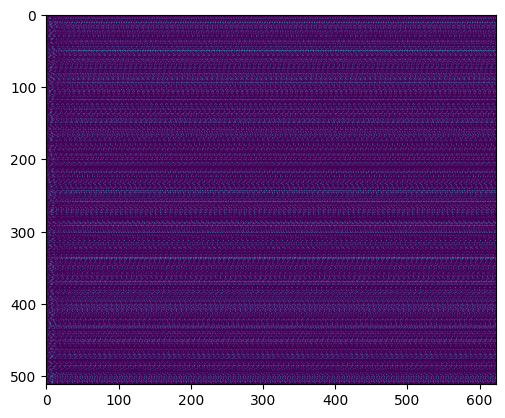

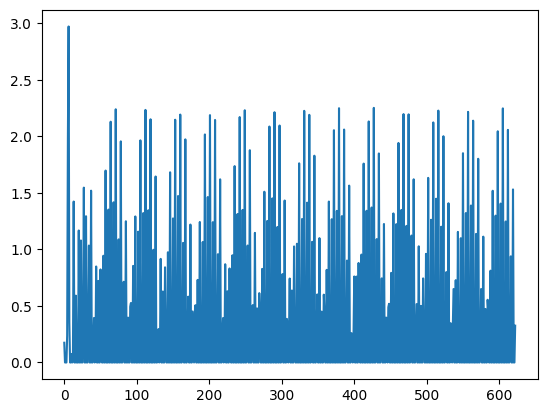

In [24]:
import matplotlib.pyplot as plt
cc = c[0].detach().numpy()

fig, ax = plt.subplots()

ax.imshow(cc)

fig, ax = plt.subplots()
ax.plot(cc[6])

# look at aud wav; what if we are picking up someone speaking